In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os
import sys
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

#working with relative path's
#get the currently worked direcotry
directory=Path(os.getcwd()).parents[0]
sys.path.insert(0,str(directory))

#Implementation of silhouette


from sklearn.metrics.cluster import unsupervised

def silhouette_samples(X,labels,metric='euclidean',**kwds):
	"""Compute the Silhouette Coefficient for each sample.

	    The Silhouette Coefficient is a measure of how well samples are clustered
	    with samples that are similar to themselves. Clustering models with a high
	    Silhouette Coefficient are said to be dense, where samples in the same
	    cluster are similar to each other, and well separated, where samples in
	    different clusters are not very similar to each other.
	    The Silhouette Coefficient is calculated using the mean intra-cluster
	    distance (``a``) and the mean nearest-cluster distance (``b``) for each
	    sample.  The Silhouette Coefficient for a sample is ``(b - a) / max(a,
	    b)``.
	    Note that Silhouette Coefficient is only defined if number of labels
	    is 2 <= n_labels <= n_samples - 1.
	    This function returns the Silhouette Coefficient for each sample.
	    The best value is 1 and the worst value is -1. Values near 0 indicate
	    overlapping clusters.
	    Read more in the :ref:`User Guide <silhouette_coefficient>`.

	Args:	
		X : array [n_samples_a, n_samples_a] if metric == “precomputed”, or, [n_samples_a, n_features] otherwise
		Array of pairwise distances between samples, or a feature array.

		labels : array, shape = [n_samples]
		label values for each sample

		metric : string, or callable
		The metric to use when calculating distance between instances in a feature array. If metric is a string, it must be one of the options allowed by sklearn.metrics.pairwise.pairwise_distances. If X is the distance array itself, use “precomputed” as the metric.

		`**kwds` : optional keyword parameters
		Any further parameters are passed directly to the distance function. If using a scipy.spatial.distance metric, the parameters are still metric dependent. See the scipy docs for usage examples.

	Returns:	
		silhouette : array, shape = [n_samples]
			Silhouette Coefficient for each samples.
	"""

	return unsupervised.silhouette_samples(X,labels,metric,**kwds)

def silhouette_score(X,labels,metric='euclidean',sample_size=None,random_state=None,**kwds):
	"""Compute the mean Silhouette Coefficient of all samples.

	    The Silhouette Coefficient is calculated using the mean intra-cluster
	    distance (``a``) and the mean nearest-cluster distance (``b``) for each
	    sample.  The Silhouette Coefficient for a sample is ``(b - a) / max(a,
	    b)``.  To clarify, ``b`` is the distance between a sample and the nearest
	    cluster that the sample is not a part of.
	    Note that Silhouette Coefficient is only defined if number of labels
	    is 2 <= n_labels <= n_samples - 1.
	    This function returns the mean Silhouette Coefficient over all samples.
	    To obtain the values for each sample, use :func:`silhouette_samples`.
	    The best value is 1 and the worst value is -1. Values near 0 indicate
	    overlapping clusters. Negative values generally indicate that a sample has
	    been assigned to the wrong cluster, as a different cluster is more similar.
	    Read more in the :ref:`User Guide <silhouette_coefficient>`.
	    Parameters

 	Args:
	    X : array [n_samples_a, n_samples_a] if metric == "precomputed", or, \
	             [n_samples_a, n_features] otherwise
	        Array of pairwise distances between samples, or a feature array.
	    labels : array, shape = [n_samples]
	         Predicted labels for each sample.
	    metric : string, or callable
	        The metric to use when calculating distance between instances in a
	        feature array. If metric is a string, it must be one of the options
	        allowed by :func:`metrics.pairwise.pairwise_distances
	        <sklearn.metrics.pairwise.pairwise_distances>`. If X is the distance
	        array itself, use ``metric="precomputed"``.
	    sample_size : int or None
	        The size of the sample to use when computing the Silhouette Coefficient
	        on a random subset of the data.
	        If ``sample_size is None``, no sampling is used.
	    random_state : int, RandomState instance or None, optional (default=None)
	        The generator used to randomly select a subset of samples.  If int,
	        random_state is the seed used by the random number generator; If
	        RandomState instance, random_state is the random number generator; If
	        None, the random number generator is the RandomState instance used by
	        `np.random`. Used when ``sample_size is not None``.
	    **kwds : optional keyword parameters
	        Any further parameters are passed directly to the distance function.
	        If using a scipy.spatial.distance metric, the parameters are still
	        metric dependent. See the scipy docs for usage examples.

    Returns:
	    silhouette : float
	        Mean Silhouette Coefficient for all samples.
	"""

	return unsupervised.silhouette_score(X,labels,metric,sample_size,random_state,**kwds)

def silhouette_plot(X,labels,metric='euclidean',fig_size = None,cluster = None,y=None,index = False,**kwds):

	"""Makes a silhouette bar graph.

    	Calculate the silhouette of the samples and then plot a graph of the chosen cluster 
    	and the silhouettes of the samples or plot a graph with all the means of the 
    	silhouettes of the clusters

    Args:
    	X : array [n_samples_a, n_samples_a] if metric == "precomputed", or, \
	             [n_samples_a, n_features] otherwise
	        Array of pairwise distances between samples, or a feature array.
	   	labels : array, shape = [n_samples]
	         Predicted labels for each sample.
	   	metric : string, or callable
	        The metric to use when calculating distance between instances in a
	        feature array. If metric is a string, it must be one of the options
	        allowed by :func:`metrics.pairwise.pairwise_distances
	        <sklearn.metrics.pairwise.pairwise_distances>`. If X is the distance
	        array itself, use ``metric="precomputed"``.
	  	fig_size : number, type int
	  		Number for the figsize of the plot if fig_size == None then a 
	  		calculation is made to leave a suitable size for the quantity of samples.
	  	cluster : number do cluster,type int
	  		Cluster number to generate the silhouettes graph of its samples 
	  		if cluster == None will then generate a plot of the mean silhouettes of all clusters.
	  	y : Smple ID
	  		ID of the samples, used to label the bars on the y-axis

	  	**kwds : optional keyword parameters
	        Any further parameters are passed directly to the distance function.
	        If using a scipy.spatial.distance metric, the parameters are still
	        metric dependent. See the scipy docs for usage examples.




    Returns:
        Void

    """
    
	silhouette_samples = unsupervised.silhouette_samples(X,labels,metric,**kwds)

	df = pd.DataFrame(silhouette_samples)
	df['cluster'] = labels

	if cluster == None:
		cluster_means = df.groupby('cluster').mean()
		dit = dict(zip(cluster_means.index,cluster_means[0]))
		df2 = pd.DataFrame(list(dit.items()))
		df2.columns = ['Cluster','silhouette_mean']
		
		
		if fig_size == None:
			if len(df2) > 64:
				fig = plt.figure(figsize=(len(df2)/8,len(df2)/4))
			else:
				fig = plt.figure(figsize=(8,6))
		else:
			fig = plt.figure(figsize = fig_size)


		df2 = df2.sort_values(['silhouette_mean'],ascending=False).reset_index(drop=True)
		ax = sns.barplot(df2['silhouette_mean'],y = df2.index,orient='h')
		ax.set_yticklabels(df2['Cluster'])
		plt.ylabel('Cluster')
		plt.show()	

	elif cluster != None:

		if y.all() != None:
			df['y'] = y

		cluster = df[df['cluster'] == cluster]
		cluster.columns = ['silhouette','Cluster','y']
		cluster = cluster.sort_values(['silhouette'],ascending=False).reset_index(drop=True)
		
		if fig_size == None:
			if len(cluster) > 64:
				fig = plt.figure(figsize=(len(cluster)/8,len(cluster)/4))
			else:
				fig = plt.figure(figsize=(8,6))
		else:
			fig = plt.figure(figsize = fig_size)

		ax = sns.barplot(cluster['silhouette'],y = cluster.index,orient='h')

		if index != None:
			ax.set_yticklabels(cluster['y'])

		plt.ylabel('ID samples')
		plt.show()

def elbow(data, max_number_of_clusters, step = 1):
    """Plots the elbow containing the variance of each cluster
    Args:
        data: data to be clustered
        max_number_of_clusters: maximum number of clusters
        step: determines how much the iteraction will increase (1 by default)
            For example, if step = 10, the function will plot the elbow for every 10 clusters
    Returns:
        void
    """
    data = data[0]
    distortions = []
    K = np.arange(1, max_number_of_clusters+1,step)
    for k in K:
        kmeans = KMeans(n_clusters=k).fit(data)
        kmeans.fit(data)
        distortions.append(sum(np.min(cdist(data, kmeans.cluster_centers_, 'euclidean'), axis=1)) / len(data))

    # Plot the elbow
    plt.plot(K, distortions, 'x-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

#Dunn Index:

def normalize_to_smallest_integers(labels):
    """Normalizes a list of integers so that each number is reduced to the minimum possible integer, maintaining the order of elements.
    
    Args:
        labels: the list to be normalized
    
    Returns:
        numpy.array with the values normalized as the minimum integers between 0 and the maximum possible value.
    """

    max_v = len(set(labels)) if -1 not in labels else len(set(labels)) - 1
    sorted_labels = np.sort(np.unique(labels))
    unique_labels = range(max_v)
    new_c = np.zeros(len(labels), dtype=np.int32)

    for i, clust in enumerate(sorted_labels):
        new_c[labels == clust] = unique_labels[i]

    return new_c


def dunn(labels, distances):
    """
    Dunn index for cluster validation (the bigger, the better)
    
    .. math:: D = \\min_{i = 1 \\ldots n_c; j = i + 1\ldots n_c} \\left\\lbrace \\frac{d \\left( c_i,c_j \\right)}{\\max_{k = 1 \\ldots n_c} \\left(diam \\left(c_k \\right) \\right)} \\right\\rbrace
    
    Args:
        labels: a list containing cluster labels for each of the n elements
        distances: an n x n numpy.array containing the pairwise distances between elements
    
    Returns:
        The computed Dunn Index for the given data
    """

    labels = normalize_to_smallest_integers(labels)

    unique_cluster_distances = np.unique(min_cluster_distances(labels, distances))
    max_diameter = max(diameter(labels, distances))

    if np.size(unique_cluster_distances) > 1:
        return unique_cluster_distances[1] / max_diameter
    else:
        return unique_cluster_distances[0] / max_diameter


def min_cluster_distances(labels, distances):
    """Calculates the distances between the two nearest points of each cluster.

    Args:
        labels: a list containing cluster labels for each of the n elements
        distances: an n x n numpy.array containing the pairwise distances between elements

    Returns:
        List containing distances between the two nearest points of each cluster
    """
    labels = normalize_to_smallest_integers(labels)
    n_unique_labels = len(np.unique(labels))

    min_distances = np.zeros((n_unique_labels, n_unique_labels))
    for i in np.arange(0, len(labels) - 1):
        for ii in np.arange(i + 1, len(labels)):
            if labels[i] != labels[ii] and distances[i, ii] > min_distances[labels[i], labels[ii]]:
                min_distances[labels[i], labels[ii]] = min_distances[labels[ii], labels[i]] = distances[i, ii]
    return min_distances

    
def diameter(labels, distances):
    """Calculates cluster diameters (the distance between the two farthest data points in a cluster)
    
    Args:
        labels: a list containing cluster labels for each of the n elements
        distances: an n x n numpy.array containing the pairwise distances between elements
    
    Returns:
        List containing diameters of each cluster
    """
    labels = normalize_to_smallest_integers(labels)
    n_clusters = len(np.unique(labels))
    diameters = np.zeros(n_clusters)

    for i in np.arange(0, len(labels) - 1):
        for ii in np.arange(i + 1, len(labels)):
            if labels[i] == labels[ii] and distances[i, ii] > diameters[labels[i]]:
                diameters[labels[i]] = distances[i, ii]
    return diameters
        

def cluster_evaluation(X,labels,distances,max_number_of_clusters = None,step = 1,fig_size = None,cluster = None,y=None):

	"""Evaluates the clustering trough Silhouette and Elbow plots and Dunn Index.

    Args:
    	X : array [n_samples_a, n_samples_a] if metric == "precomputed", or, \
	             [n_samples_a, n_features] otherwise
	        Array of pairwise distances between samples, or a feature array.
	   	labels : array, shape = [n_samples]
	         Predicted labels for each sample.
	   	distances : list containing distances
	   		Distances between each data, used in the evaluation functions 
	   	max_number_of_clusters : number int
	   		maximum allowed number of clusters
	   	step : determines how much the iteraction will increase (1 by default)
            For example, if step = 10, the function will plot the elbow for every 10 clusters
	  	fig_size : number, type int
	  		Number for the figsize of the plot if fig_size == None then a 
	  		calculation is made to leave a suitable size for the quantity of samples.
	  	cluster : number do cluster,type int
	  		Cluster number to generate the silhouettes graph of its samples 
	  		if cluster == None will then generate a plot of the mean silhouettes of all clusters.
	  	y : Smple ID
	  		ID of the samples, used to label the bars on the y-axis

	  	**kwds : optional keyword parameters
	        Any further parameters are passed directly to the distance function.
	        If using a scipy.spatial.distance metric, the parameters are still
	        metric dependent. See the scipy docs for usage examples.

    Returns:
        Void

    """
	print("Result of silhouette: "+ str(silhouette_score(distances,labels, metric= 'precomputed')))
	print("Result of dunn index: " + str(dunn(labels,distances)),"\n")
	if max_number_of_clusters != None:
		elbow(X,max_number_of_clusters,step)
	silhouette_plot(distances,labels,metric= 'precomputed',fig_size = fig_size,cluster = cluster,y=y)

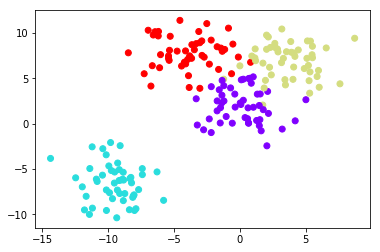

In [63]:
from sklearn.datasets import make_blobs
data = make_blobs(n_samples=200, n_features=2, 
                           centers=4, cluster_std=1.8,random_state=101)
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

plt.show()

Result of silhouette: 0.5277296453101425
Result of dunn index: 1.4016762687245226 



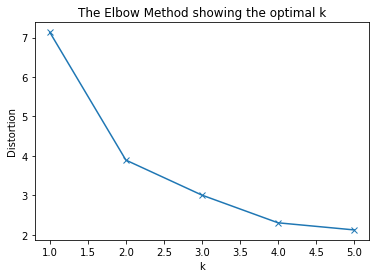

C:\Users\Luan Brasil\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


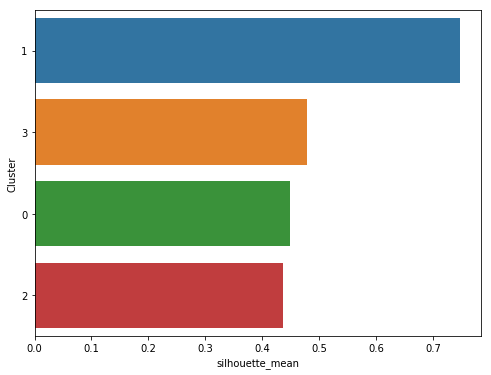

In [64]:
from sklearn.metrics.pairwise import euclidean_distances
cluster_evaluation(data, data[1], euclidean_distances(data[0]), max_number_of_clusters = 5, y=data[1])

Result of silhouette: 0.5277296453101425
Result of dunn index: 1.4016762687245226 



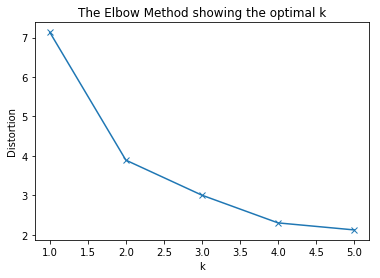

C:\Users\Luan Brasil\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


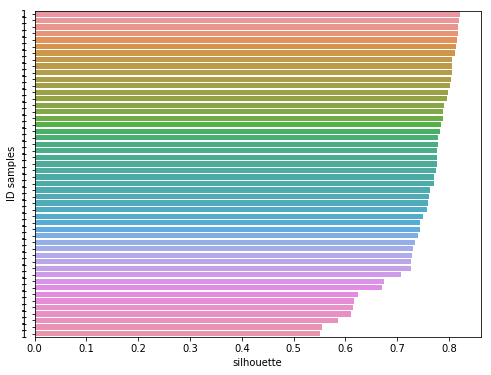

In [65]:
from sklearn.metrics.pairwise import euclidean_distances
cluster_evaluation(data, data[1], euclidean_distances(data[0]), max_number_of_clusters = 5, y=data[1], cluster=1)

In [36]:
np.unique(data[1])

array([0, 1, 2, 3])